In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2008 = "../../datasets/subsets/supp_ex/supp_ex_2008.csv"

supp_2008 = pd.read_csv(file_2008)
supp_2008 = supp_2008.set_index(['STNAME'])
supp_2008

,2008_E212,2008_E213,2008_E214,2008_E215,2008_E216,2008_E217,2008_E218,2008_E222,2008_E223,2008_E224,...,2008_E256,2008_E257,2008_E258,2008_E262,2008_E263,2008_E264,2008_E265,2008_E266,2008_E267,2008_E268
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,213927477,192827474,71906603,284516456,171866227,151982711,63673246,82508048,70661027,23185496,...,6725373,74494937,1395506,2687360.0,3849015.0,56632192.0,1826718.0,187071.0,43212.0,2534817.0
alaska,71630623,44128799,11326691,65710112,63322252,5935646,29938433,52437406,29080843,7822643,...,3347060,678092,2551753,796011.0,796739.0,1503487.0,242528.0,105716.0,14691.0,68471.0
arizona,596901569,153827289,54152128,292895440,285146421,161931556,151330801,83968769,41343656,14959277,...,44059203,58175923,25379357,130742096.0,669335.0,14562962.0,2659294.0,37797446.0,1417260.0,21833213.0
arkansas,139090126,183606524,58903153,168392425,130038357,78126512,54917965,35290980,44454526,16880800,...,7173455,22217450,5180359,396993.0,2915375.0,9897188.0,799002.0,4289540.0,1085159.0,2911959.0
california,2088056218,2414421930,280171188,2856438226,2379323420,579763322,1405939471,677716746,767133114,107374524,...,59672821,59691185,38879261,356974.0,3205295.0,11357068.0,1979384.0,241146.0,89369.0,7243896.0
colorado,228711305,237139562,49431053,351885902,256758341,129788141,164629886,80589911,73867398,14407929,...,16749805,24952543,37184282,3726921.0,2705134.0,4532182.0,3357933.0,526239.0,183925.0,4031509.0
connecticut,335893955,146649866,87306434,324658235,281742846,25346011,95924880,127816442,54809370,38763640,...,31670580,2666164,6144341,1054430.0,1375076.0,4415984.0,1717263.0,3747536.0,579853.0,4902710.0
delaware,46625170,12377629,9423185,55026475,50088009,17185109,35558450,20783993,5458468,4112259,...,2181438,4863133,73877,4650.0,NaN,NaN,NaN,NaN,NaN,2705250.0
district of columbia,42899072,39902060,20731756,51103841,52346546,53186359,20002444,4904378,4997254,2106729,...,998803,2208886,4285336,17974.0,209226.0,NaN,NaN,NaN,NaN,25978835.0


In [4]:
(supp_2008.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california    22.482988
texas         13.948323
new york      13.704353
new jersey     9.236057
illinois       8.766528
dtype: float64

In [5]:
summary_2008 = pd.DataFrame(supp_2008.sum(axis=1)/100000000, columns=['Total SupportEx ($100M)'])
summary_2008['Salaries SupportEx ($100M)'] = supp_2008.iloc[:,0:7].sum(axis=1)/100000000
summary_2008['Benefits SupportEx ($100M)'] = supp_2008.iloc[:,7:14].sum(axis=1)/100000000
summary_2008['Services SupportEx ($100M)'] = supp_2008.iloc[:,14:21].sum(axis=1)/100000000
summary_2008['Supplies SupportEx ($100M)'] = supp_2008.iloc[:,21:28].sum(axis=1)/100000000
summary_2008['Property SupportEx ($100M)'] = supp_2008.iloc[:,28:35].sum(axis=1)/100000000
summary_2008['Other SupportEx ($100M)'] = supp_2008.iloc[:,35:42].sum(axis=1)/100000000
summary_2008

,Total SupportEx ($100M),Salaries SupportEx ($100M),Benefits SupportEx ($100M),Services SupportEx ($100M),Supplies SupportEx ($100M),Property SupportEx ($100M),Other SupportEx ($100M)
STNAME,,,,,,,
alabama,24.657782,11.507002,5.036928,2.716659,3.845024,0.874565,0.677604
alaska,7.533999,2.919926,1.963310,1.520972,0.991947,0.102569,0.035276
arizona,33.987902,16.961852,4.211853,5.364338,3.711281,1.641761,2.096816
arkansas,15.441796,8.130751,2.130945,2.250125,2.230540,0.476484,0.222952
california,224.829882,120.041138,41.699386,37.904208,23.114801,1.825618,0.244731
colorado,29.204916,14.183442,5.010580,5.910749,2.927656,0.981850,0.190638
connecticut,28.881017,12.975222,5.097388,7.473188,2.551266,0.606025,0.177929
delaware,5.388363,2.262840,1.027234,1.823915,0.166121,0.081154,0.027099
district of columbia,5.443587,2.801721,0.459147,1.302614,0.527939,0.090106,0.262060


In [6]:
summary_pct = pd.DataFrame(summary_2008['Salaries SupportEx ($100M)'] / summary_2008['Total SupportEx ($100M)'] *100, columns = ['Salaries (%)'])
summary_pct['Benefits (%)'] = summary_2008['Benefits SupportEx ($100M)'] / summary_2008['Total SupportEx ($100M)'] *100
summary_pct['Services (%)'] = summary_2008['Services SupportEx ($100M)'] / summary_2008['Total SupportEx ($100M)'] *100
summary_pct['Supplies (%)'] = summary_2008['Supplies SupportEx ($100M)'] / summary_2008['Total SupportEx ($100M)'] *100
summary_pct['Property (%)'] = summary_2008['Property SupportEx ($100M)'] / summary_2008['Total SupportEx ($100M)'] *100
summary_pct['Other (%)'] = summary_2008['Other SupportEx ($100M)'] / summary_2008['Total SupportEx ($100M)'] *100
summary_pct

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%)
STNAME,,,,,,
alabama,46.666817,20.427338,11.017450,15.593551,3.546811,2.748032
alaska,38.756648,26.059328,20.188106,13.166277,1.361411,0.468230
arizona,49.905558,12.392213,15.783081,10.919419,4.830428,6.169301
arkansas,52.654176,13.799853,14.571652,14.444819,3.085676,1.443823
california,53.391985,18.547083,16.859061,10.281018,0.812000,0.108852
colorado,48.565255,17.156633,20.238884,10.024533,3.361934,0.652761
connecticut,44.926472,17.649613,25.875778,8.833713,2.098349,0.616074
delaware,41.994947,19.063933,33.849142,3.082962,1.506098,0.502917
district of columbia,51.468281,8.434644,23.929339,9.698363,1.655261,4.814111


In [7]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2008.csv"

success_2008 = pd.read_csv(dropout_path)
success_2008

,STNAME,2008_DRP912,2008_DRP9,2008_DRP10,2008_DRP11,2008_DRP12,2008_DRPAM,2008_DRPAS,2008_DRPHI,2008_DRPBL,2008_DRPWH
0,alabama,2.199999,1.900000,2.400000,2.500000,1.799999,1.799999,1.099999,2.199999,2.199999,2.099998
1,alaska,7.299999,4.299999,5.799999,9.000000,10.399994,12.199997,6.899998,7.500000,9.599998,5.099998
2,arizona,6.699997,4.199997,5.099998,6.799999,10.799995,11.399994,3.799999,7.299999,7.099998,5.599998
3,arkansas,4.699997,2.799999,4.199997,5.699997,6.299999,4.899998,2.799999,5.099998,6.699997,4.000000
4,california,5.000000,2.500000,3.000000,4.099998,11.000000,6.599998,2.299999,6.000000,9.000000,3.099998
5,colorado,6.399998,3.900000,4.799999,7.199997,10.199997,11.299995,3.799999,12.099998,10.599998,3.900000
6,connecticut,2.799999,2.599998,2.900000,3.099998,2.699999,2.500000,1.500000,6.099998,5.599998,1.599999
7,delaware,6.000000,6.299999,6.399998,5.199997,6.199997,9.399994,NaN,8.199997,7.699997,4.899998
8,district of columbia,5.500000,5.699997,5.899998,5.199997,4.699997,NaN,NaN,NaN,NaN,NaN
9,florida,3.299999,2.799999,3.000000,3.099998,3.599998,2.500000,1.099999,3.699999,4.699997,2.099998


In [8]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_pct['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
alabama,46.666817,20.427338,11.017450,15.593551,3.546811,2.748032,2.2
alaska,38.756648,26.059328,20.188106,13.166277,1.361411,0.468230,7.3
arizona,49.905558,12.392213,15.783081,10.919419,4.830428,6.169301,6.7
arkansas,52.654176,13.799853,14.571652,14.444819,3.085676,1.443823,4.7
california,53.391985,18.547083,16.859061,10.281018,0.812000,0.108852,5
colorado,48.565255,17.156633,20.238884,10.024533,3.361934,0.652761,6.4
connecticut,44.926472,17.649613,25.875778,8.833713,2.098349,0.616074,2.8
delaware,41.994947,19.063933,33.849142,3.082962,1.506098,0.502917,6
district of columbia,51.468281,8.434644,23.929339,9.698363,1.655261,4.814111,5.5


In [9]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
louisiana,46.047883,16.810506,21.667531,10.618153,3.024604,1.831322,7.5
alaska,38.756648,26.059328,20.188106,13.166277,1.361411,0.468230,7.3
arizona,49.905558,12.392213,15.783081,10.919419,4.830428,6.169301,6.7
colorado,48.565255,17.156633,20.238884,10.024533,3.361934,0.652761,6.4
michigan,44.878854,21.846395,18.981107,10.171558,2.271104,1.850983,6.2
delaware,41.994947,19.063933,33.849142,3.082962,1.506098,0.502917,6
washington,54.686729,18.305846,18.942029,5.671715,2.037318,0.356363,5.7
district of columbia,51.468281,8.434644,23.929339,9.698363,1.655261,4.814111,5.5
hawaii,44.444427,16.077717,26.718320,11.732844,0.631946,0.394746,5.4


In [10]:
summary_2008['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_2008['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    

summary_2008 = summary_2008[summary_2008['Dropout Rate'].notna()]
summary_2008['Dropout Rate'] = summary_2008['Dropout Rate'].astype(float)
summary_2008.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, alabama to wyoming
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total SupportEx ($100M)     50 non-null     float64
 1   Salaries SupportEx ($100M)  50 non-null     float64
 2   Benefits SupportEx ($100M)  50 non-null     float64
 3   Services SupportEx ($100M)  50 non-null     float64
 4   Supplies SupportEx ($100M)  50 non-null     float64
 5   Property SupportEx ($100M)  50 non-null     float64
 6   Other SupportEx ($100M)     50 non-null     float64
 7   Dropout Rate                50 non-null     float64
dtypes: float64(8)
memory usage: 3.5+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


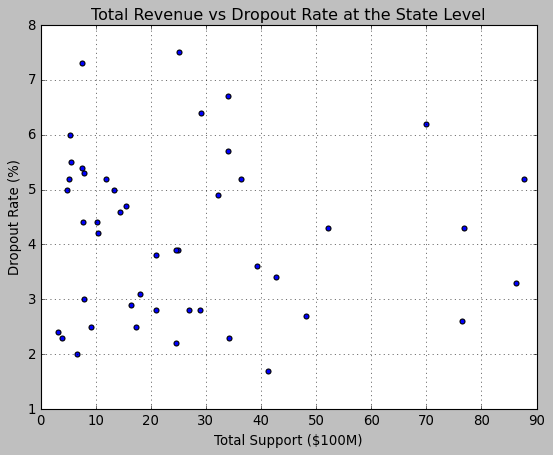

In [11]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2008['Total SupportEx ($100M)'], summary_2008['Dropout Rate'])
plt.xlabel('Total Support ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total Revenue vs Dropout Rate at the State Level")
plt.grid()

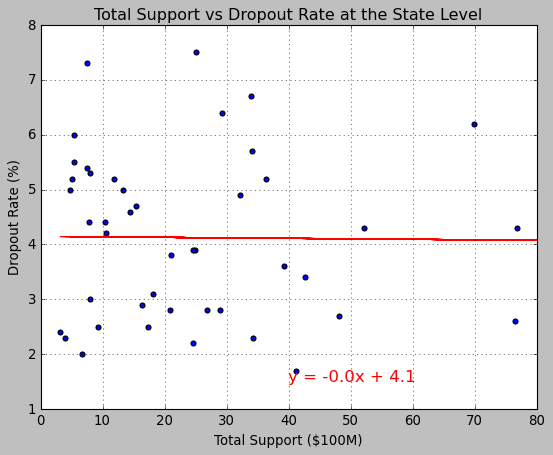

The correlation between both factors is -0.0251


In [12]:
# Total Support vs Dropout Rate
x_values = summary_2008['Total SupportEx ($100M)']
y_values = summary_2008['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Support ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Support vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 80)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [13]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_pct['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, alabama to wyoming
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salaries (%)  50 non-null     float64
 1   Benefits (%)  50 non-null     float64
 2   Services (%)  50 non-null     float64
 3   Supplies (%)  50 non-null     float64
 4   Property (%)  50 non-null     float64
 5   Other (%)     50 non-null     float64
 6   Dropout Rate  50 non-null     float64
dtypes: float64(7)
memory usage: 3.1+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


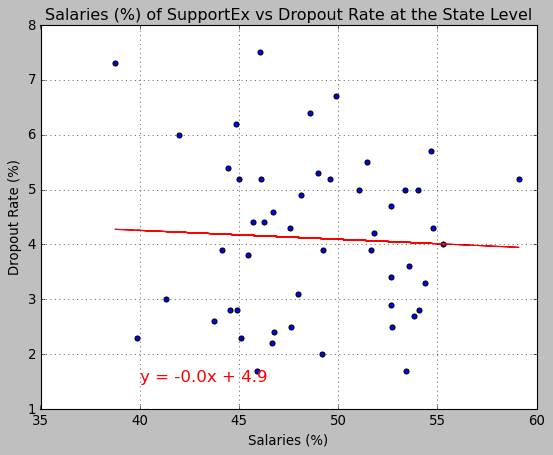

The correlation between both factors is -0.049


In [14]:
# Salaries (%) vs Dropout Rate
x_values = summary_pct['Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 35, right = 60)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

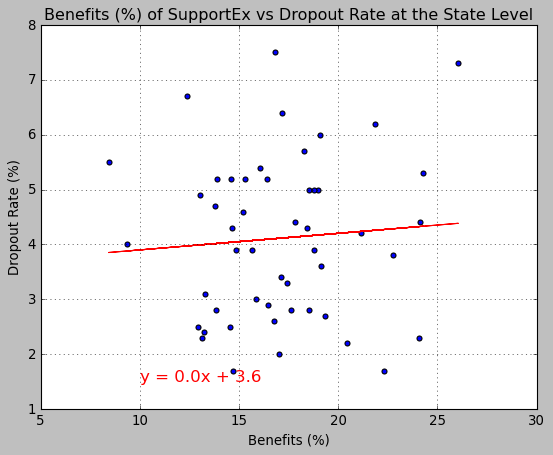

The correlation between both factors is 0.0762


In [15]:
# Benefits (%) vs Dropout Rate
x_values = summary_pct['Benefits (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Benefits (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Benefits (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 30)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

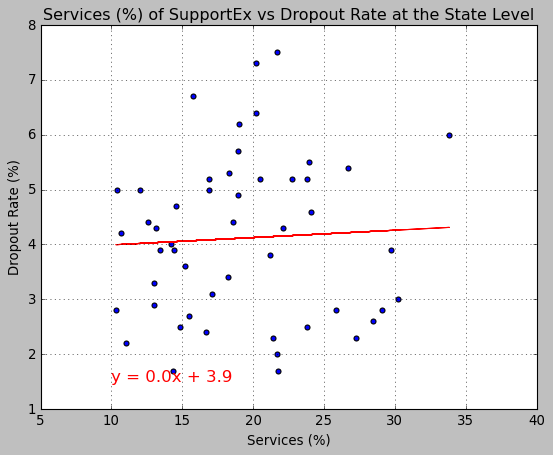

The correlation between both factors is 0.0527


In [16]:
# Services (%) vs Dropout Rate
x_values = summary_pct['Services (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Services (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Services (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 40)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

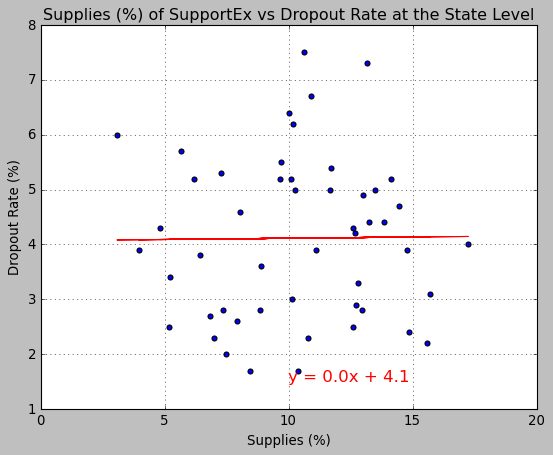

The correlation between both factors is 0.0103


In [17]:
# Supplies (%) vs Dropout Rate
x_values = summary_pct['Supplies (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Supplies (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Supplies (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 20)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

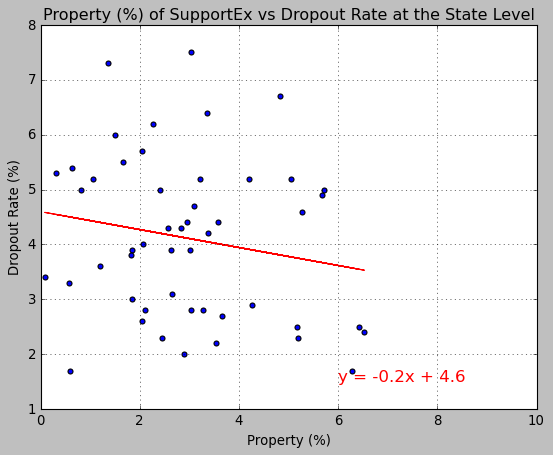

The correlation between both factors is -0.1851


In [18]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Property (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Property (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Property (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

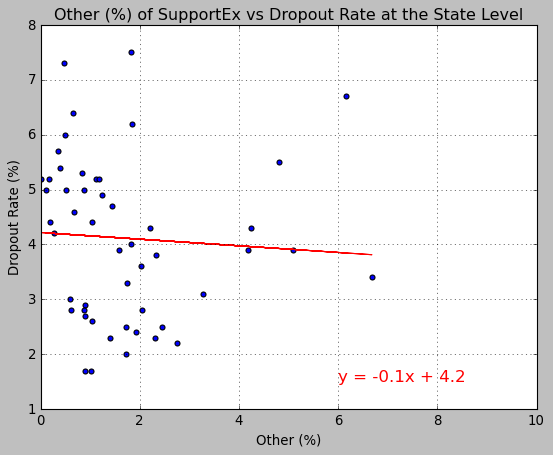

The correlation between both factors is -0.0627


In [19]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Other (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Other (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Other (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")